<a href="https://colab.research.google.com/github/Rishabh-defi/Compute-Tasks/blob/main/MLTask3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import seaborn as sns

In [77]:
df_countries = pd.read_csv(r"/content/Country.csv")
df_leagues = pd.read_csv(r"/content/League.csv")
df_matches = pd.read_csv(r"/content/matches.csv")
df_teams=pd.read_csv(r"/content/Team.csv")
df_TeamAttributes=pd.read_csv(r"/content/Team_Attributes.csv")

In [60]:
df_matches['Country_name'] = df_matches['country_id'].map(df_leagues.set_index('country_id')['name.1'].drop_duplicates())  
df_matches

,Unnamed: 0,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,...,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA,Country_name
0,0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,...,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20,Belgium
1,1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,...,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60,Belgium
2,2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,...,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75,Belgium
3,3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,...,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50,Belgium
4,4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,...,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67,Belgium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24528,24528,24529,21518,21518,2015/2016,7,2015-10-03 00:00:00,2030143,8306,8372,...,2.05,3.40,4.10,NaN,NaN,NaN,NaN,NaN,NaN,Spain
24529,24529,24530,21518,21518,2015/2016,7,2015-10-02 00:00:00,2030144,9910,8305,...,1.50,4.50,7.50,NaN,NaN,NaN,NaN,NaN,NaN,Spain
24530,24530,24531,21518,21518,2015/2016,7,2015-10-04 00:00:00,2030145,8581,10205,...,4.40,3.60,1.93,NaN,NaN,NaN,NaN,NaN,NaN,Spain
24531,24531,24532,21518,21518,2015/2016,7,2015-10-04 00:00:00,2030146,9906,8633,...,3.13,3.40,2.45,NaN,NaN,NaN,NaN,NaN,NaN,Spain


In [61]:
df_matches['League_name'] = df_matches['country_id'].map(df_leagues.set_index('country_id')['name'].drop_duplicates())

In [62]:
df_matches['Home_team_name'] = df_matches['home_team_api_id'].map(df_teams.set_index('team_api_id')['team_long_name'].drop_duplicates()) 

In [63]:
df_matches['Away_team_name'] = df_matches['away_team_api_id'].map(df_teams.set_index('team_api_id')['team_long_name'].drop_duplicates())

In [85]:
df_dataframe = df_matches.groupby(['Country_name'])

KeyError: ignored

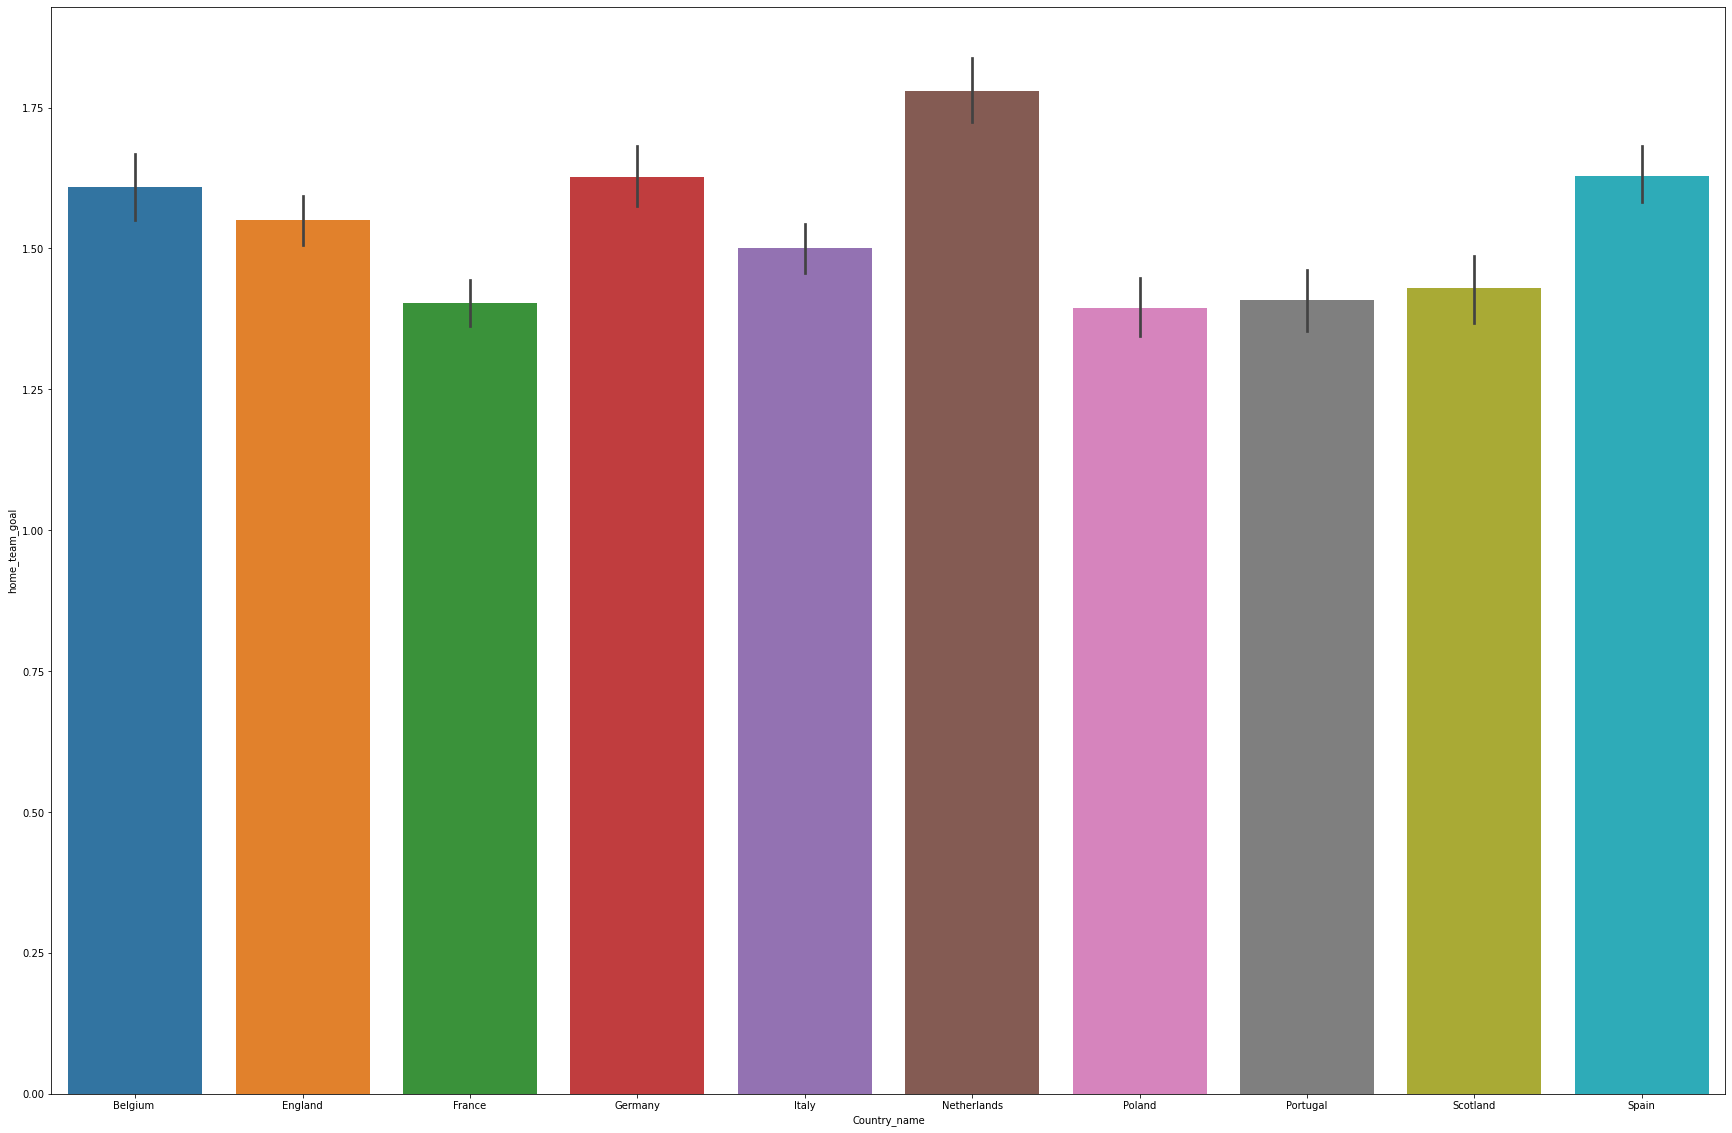

In [76]:
plt.figure(figsize=(30,20))
sns.barplot(x='Country_name',y='home_team_goal',data=df_matches) 

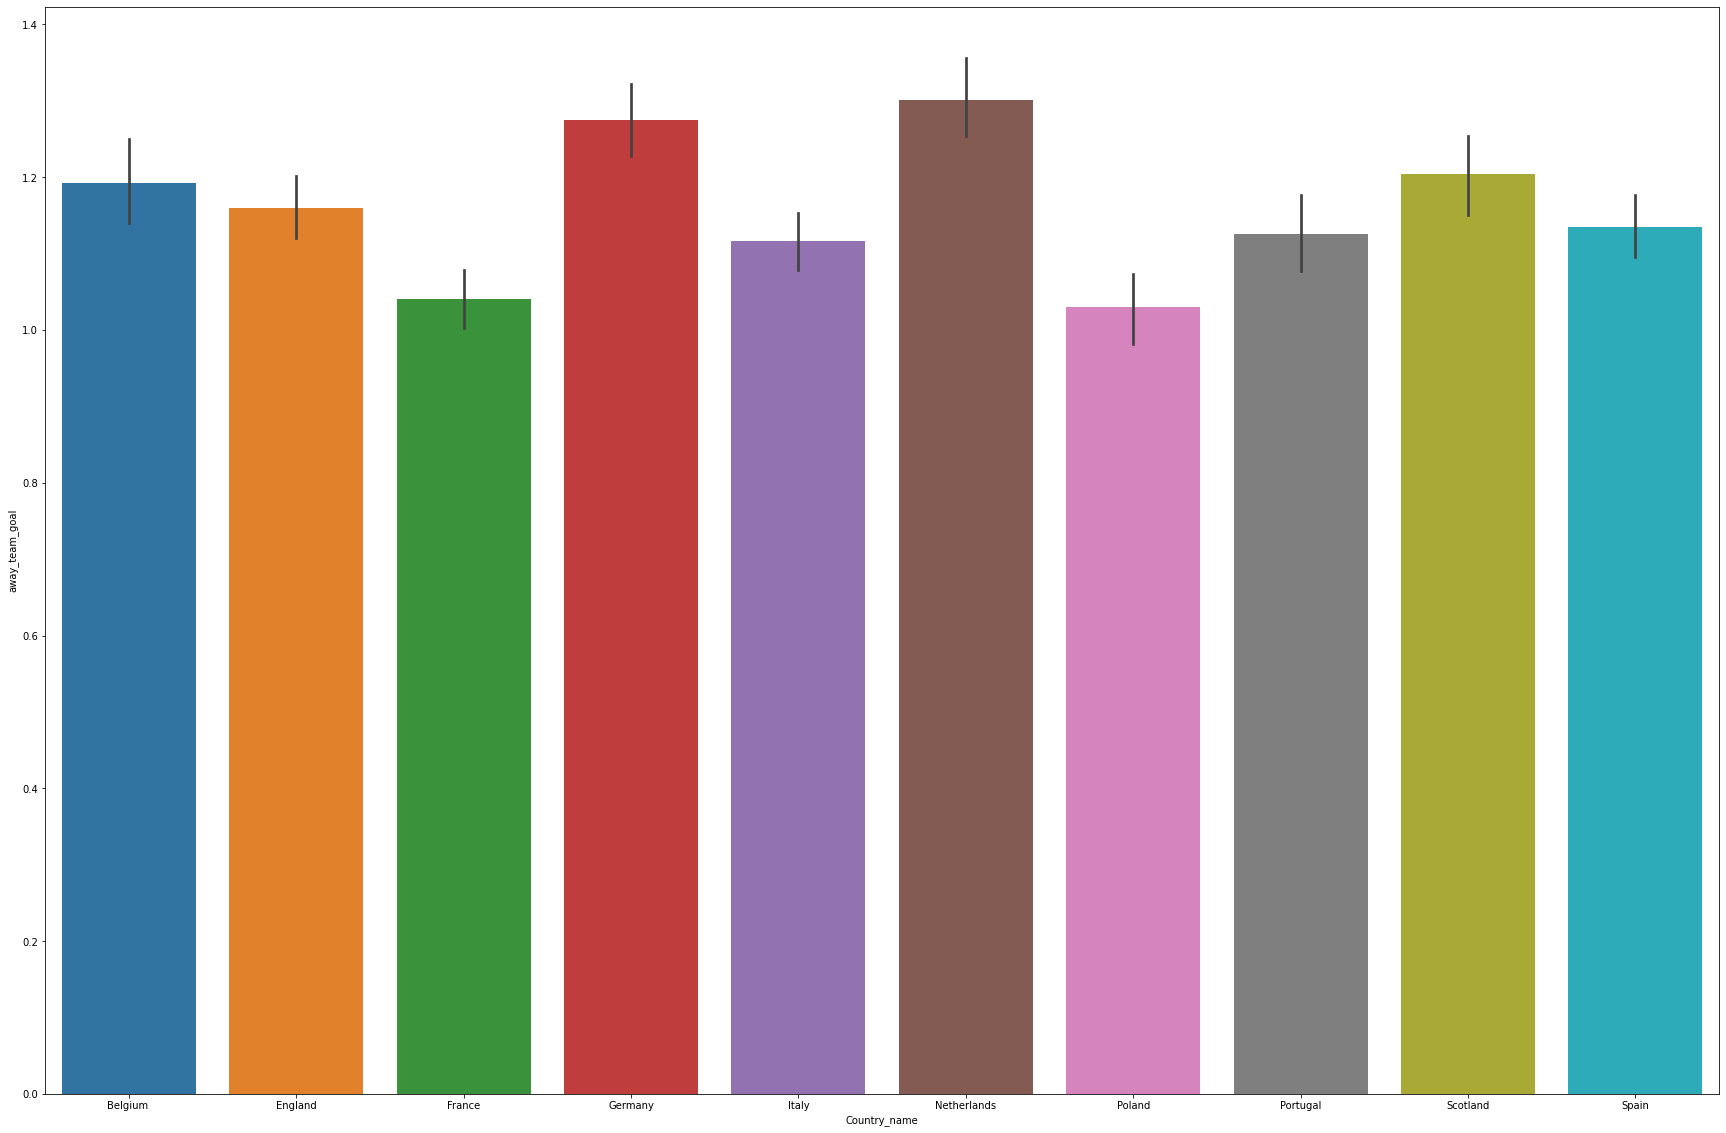

In [74]:
plt.figure(figsize=(30,20))
sns.barplot(x='Country_name',y='away_team_goal',data=df_matches)

In [110]:
df_TeamAttributes['team_name'] = df_TeamAttributes['team_api_id'].map(df_teams.set_index('team_api_id')['team_long_name'].drop_duplicates())
df_TeamAttributes

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass,team_name,country,home_goals
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,50,Medium,55,Press,45,Normal,Cover,NaN,NaN,NaN
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,47,Medium,44,Press,54,Normal,Cover,NaN,NaN,NaN
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,47,Medium,44,Press,54,Normal,Cover,NaN,NaN,NaN
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,60,Medium,70,Double,70,Wide,Cover,NaN,NaN,NaN
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,47,Medium,47,Press,52,Normal,Cover,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,240,9906,2011-02-22 00:00:00,57,Balanced,NaN,Little,54,Mixed,...,58,Medium,48,Press,54,Normal,Cover,NaN,NaN,NaN
96,97,240,9906,2012-02-22 00:00:00,47,Balanced,NaN,Little,51,Mixed,...,52,Medium,37,Press,55,Normal,Cover,NaN,NaN,NaN
97,98,240,9906,2013-09-20 00:00:00,47,Balanced,NaN,Little,51,Mixed,...,52,Medium,37,Press,55,Normal,Cover,NaN,NaN,NaN
98,99,240,9906,2014-09-19 00:00:00,47,Balanced,52.0,Normal,51,Mixed,...,52,Medium,37,Press,55,Normal,Cover,NaN,NaN,NaN


In [111]:
df_matches['Country_name'] = df_matches['country_id'].map(df_leagues.set_index('country_id')['name.1'].drop_duplicates()) 
df_TeamAttributes['country'] = df_TeamAttributes['team_api_id'].map(df_matches.set_index('home_team_api_id')['Country_name'].drop_duplicates())
df_TeamAttributes

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass,team_name,country,home_goals
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,50,Medium,55,Press,45,Normal,Cover,NaN,NaN,NaN
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,47,Medium,44,Press,54,Normal,Cover,NaN,NaN,NaN
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,47,Medium,44,Press,54,Normal,Cover,NaN,NaN,NaN
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,60,Medium,70,Double,70,Wide,Cover,NaN,NaN,NaN
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,47,Medium,47,Press,52,Normal,Cover,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,240,9906,2011-02-22 00:00:00,57,Balanced,NaN,Little,54,Mixed,...,58,Medium,48,Press,54,Normal,Cover,NaN,NaN,NaN
96,97,240,9906,2012-02-22 00:00:00,47,Balanced,NaN,Little,51,Mixed,...,52,Medium,37,Press,55,Normal,Cover,NaN,NaN,NaN
97,98,240,9906,2013-09-20 00:00:00,47,Balanced,NaN,Little,51,Mixed,...,52,Medium,37,Press,55,Normal,Cover,NaN,NaN,NaN
98,99,240,9906,2014-09-19 00:00:00,47,Balanced,52.0,Normal,51,Mixed,...,52,Medium,37,Press,55,Normal,Cover,NaN,NaN,NaN


In [99]:
df_matches['Home_team_name'] = df_matches['home_team_api_id'].map(df_teams.set_index('team_api_id')['team_long_name'].drop_duplicates())
df_vizz_teams=df_matches.groupby(['Home_team_name'])
df_vizz_teams=df_vizz_teams.first()
df_vizz_teams

,Unnamed: 0,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,...,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA,Country_name
Home_team_name,,,,,,,,,,,,,,,,,,,,,
AC Ajaccio,5908,5909,4769,4769,2011/2012,1,2011-08-06 00:00:00,1019336,8576,9941,...,2.63,3.10,3.00,2.50,3.00,2.80,2.60,3.00,2.75,France
AC Arles-Avignon,5538,5539,4769,4769,2010/2011,10,2010-10-24 00:00:00,829964,108893,9748,...,7.50,4.00,1.53,6.25,3.50,1.55,6.50,3.60,1.53,France
AJ Auxerre,4768,4769,4769,4769,2008/2009,1,2008-08-09 00:00:00,483129,8583,9830,...,2.00,2.90,3.75,2.10,3.00,3.75,2.00,2.88,3.75,France
AS Monaco,4773,4774,4769,4769,2008/2009,1,2008-08-09 00:00:00,483134,9829,9847,...,2.25,3.00,3.00,2.38,3.00,3.00,2.30,3.00,2.88,France
AS Nancy-Lorraine,4774,4775,4769,4769,2008/2009,1,2008-08-09 00:00:00,483135,8481,8639,...,2.10,3.00,3.30,2.20,3.00,3.30,2.00,3.00,3.60,France
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bromwich Albion,1754,1755,1729,1729,2008/2009,11,2008-11-01 00:00:00,489148,8659,8655,...,2.55,3.35,2.80,2.50,3.30,2.75,2.50,3.20,2.70,England
West Ham United,1731,1732,1729,1729,2008/2009,1,2008-08-16 00:00:00,489045,8654,8528,...,1.90,3.50,4.35,1.91,3.25,4.00,1.91,3.25,3.80,England
Wigan Athletic,1767,1768,1729,1729,2008/2009,12,2008-11-08 00:00:00,489161,8528,10194,...,1.75,3.40,5.00,1.80,3.30,4.75,1.83,3.30,4.50,England


In [112]:
df_vizz_s=df_TeamAttributes.groupby(['country'])
df_vizz_s=df_vizz_s.first()

(array([9.40e+19, 9.60e+19, 9.80e+19, 1.00e+20, 1.02e+20, 1.04e+20,
        1.06e+20]), <a list of 7 Text major ticklabel objects>)

<Figure size 1440x1440 with 0 Axes>

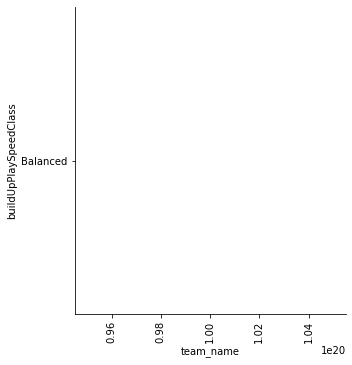

<Figure size 1440x1440 with 0 Axes>

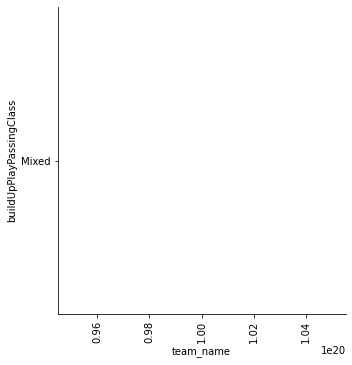

In [116]:
plt.figure(figsize=(20,20))
sns.catplot(x='team_name',y='buildUpPlaySpeedClass',data=df_vizz_s) 
plt.xticks(rotation = 90) 
plt.figure(figsize=(20,20))
sns.catplot(x='team_name',y='buildUpPlayPassingClass',data=df_vizz_s)  
plt.xticks(rotation = 90)

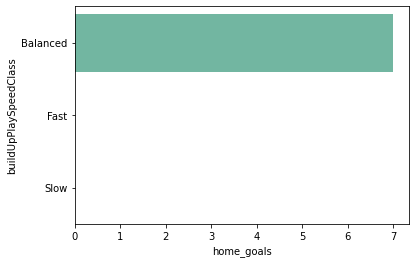

In [108]:
df_TeamAttributes['home_goals'] = df_TeamAttributes['team_api_id'].map(df_matches.set_index('home_team_api_id')['home_team_goal'].drop_duplicates()) 
sns.barplot(x='home_goals',y='buildUpPlaySpeedClass',palette='Set2',data=df_TeamAttributes)

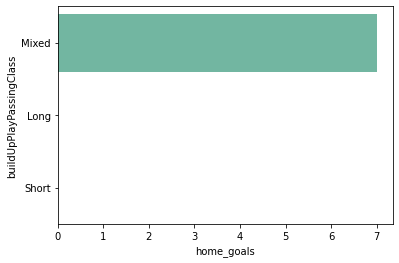

In [109]:
sns.barplot(x='home_goals',y='buildUpPlayPassingClass',palette='Set2',data=df_TeamAttributes)

In [118]:
df_vizz_bu=df_TeamAttributes.groupby(['buildUpPlayPassingClass','buildUpPlaySpeedClass']) 
df_vizz_bu=df_vizz_bu.first()

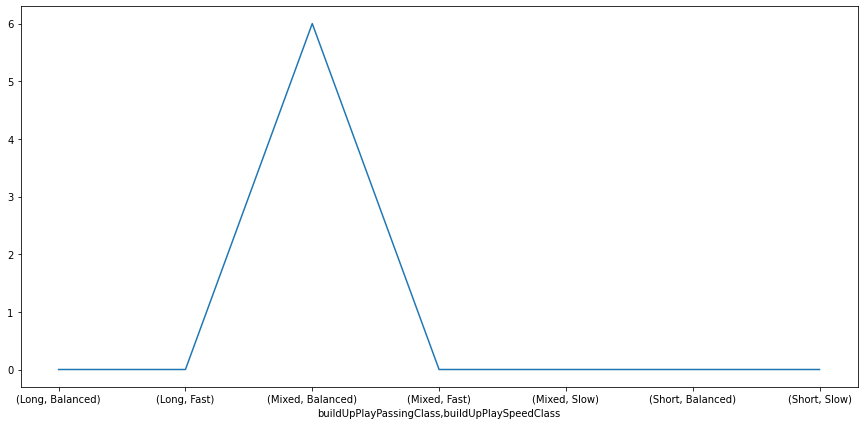

In [120]:
fig, ax = plt.subplots(figsize=(15,7))
df_vizz_bu=df_TeamAttributes.groupby(['buildUpPlayPassingClass','buildUpPlaySpeedClass']).count()['home_goals'].plot(ax=ax)